<h1> ASL Number Recognition
<h3>2018-12586 심진우

Models Used:
* Mediapipe Hands Model
* DNN Classifier

Datasets:
* https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
* https://github.com/ardamavi/Sign-Language-Digits-Dataset

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2
import tensorflow

c:\Users\jinu7\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\jinu7\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\jinu7\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\jinu7\anaconda3\envs\py37\lib\site-packages\tensorflow\python\frame

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Dataset Preprocessing

In [3]:
numbers = list("1234567890")
print(numbers)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


In [4]:
# Apply Mediapipe Hand pose estimation to image files

temp_dataset = []
dataset_dirs = ['Dataset/', 'Dataset_2/', 'Dataset_custom', 'Dataset_custom2']

for dataset_directory_prefix in dataset_dirs:
    print(dataset_directory_prefix)
    for label in numbers:
        not_detected = 0
        detected = 0

        for dirname, _, filenames in os.walk(dataset_directory_prefix + label):
            for filename in filenames:
                pathname = os.path.join(dirname, filename)

                with mp_hands.Hands(
                    static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.3
                ) as hands:

                    image = cv2.flip(cv2.imread(pathname), 1)
                    result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                    landmark_vertices_xyz = []
                    if not result.multi_hand_landmarks:
                        not_detected += 1
                    
                    else:
                        detected += 1
                        for l in result.multi_hand_landmarks[0].landmark:
                            landmark_vertices_xyz.append(l.x)
                            landmark_vertices_xyz.append(l.y)
                            landmark_vertices_xyz.append(l.z)
                        temp_dataset.append((*landmark_vertices_xyz, label))
                    
                    
        print(f'imported: {label}')
        print(f'detected: {detected}, not detected: {not_detected}')
        
landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)
            
print(*landmark_vertices_xyz_label)
        
dataset = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
dataset.head()

dataset.to_csv('data_new.csv', index=False)
dataset['target'].value_counts()

Dataset/
imported: 1
detected: 165, not detected: 41
imported: 2
detected: 161, not detected: 45
imported: 3
detected: 200, not detected: 6
imported: 4
detected: 193, not detected: 14
imported: 5
detected: 207, not detected: 0
imported: 6
detected: 174, not detected: 33
imported: 7
detected: 170, not detected: 36
imported: 8
detected: 185, not detected: 23
imported: 9
detected: 204, not detected: 0
imported: 0
detected: 174, not detected: 31
Dataset_2/
imported: 1
detected: 658, not detected: 842
imported: 2
detected: 539, not detected: 961
imported: 3
detected: 976, not detected: 524
imported: 4
detected: 577, not detected: 923
imported: 5
detected: 1231, not detected: 269
imported: 6
detected: 596, not detected: 904
imported: 7
detected: 954, not detected: 546
imported: 8
detected: 856, not detected: 644
imported: 9
detected: 758, not detected: 742
imported: 0
detected: 323, not detected: 1177
x0 y0 z0 x1 y1 z1 x2 y2 z2 x3 y3 z3 x4 y4 z4 x5 y5 z5 x6 y6 z6 x7 y7 z7 x8 y8 z8 x9 y9 z9 x

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.463997,0.885617,1.052729e-08,0.420963,0.819737,-0.040849,0.417118,0.686504,-0.063448,0.479262,...,0.605647,0.655449,-0.145693,0.554310,0.725901,-0.119649,0.539328,0.773178,-0.082614,1
1,0.404552,0.869935,-1.725917e-07,0.336123,0.791381,-0.030558,0.323879,0.633445,-0.047645,0.371748,...,0.547506,0.600329,-0.150455,0.491907,0.659235,-0.128812,0.473847,0.718214,-0.096364,1
2,0.459097,0.856278,-3.445658e-07,0.385370,0.787478,-0.044980,0.365977,0.669824,-0.068178,0.399800,...,0.604878,0.610851,-0.126887,0.549334,0.642913,-0.114677,0.506041,0.677488,-0.093234,1
3,0.521988,0.957821,-4.114511e-07,0.433483,0.882253,-0.055528,0.397795,0.747461,-0.087875,0.449227,...,0.686721,0.725969,-0.171133,0.631172,0.800920,-0.150123,0.598936,0.862632,-0.113884,1
4,0.487557,0.943703,6.623869e-08,0.414277,0.882922,-0.055812,0.387560,0.739195,-0.089053,0.414246,...,0.615550,0.719124,-0.204795,0.553916,0.796754,-0.179075,0.534841,0.854971,-0.139034,1


In [5]:
#Data augmentation by rotation

from scipy.spatial.transform import Rotation as R
#+/-45 rotation about x,y,z axis
r1 = R.from_rotvec(np.pi/4 * np.array([1, 0, 0])) 
r2 = R.from_rotvec(-np.pi/4 * np.array([1, 0, 0]))
r3 = R.from_rotvec(np.pi/4 * np.array([0, 1, 0])) 
r4 = R.from_rotvec(-np.pi/4 * np.array([0, 1, 0]))
r5 = R.from_rotvec(np.pi/4 * np.array([0, 0, 1])) 
r6 = R.from_rotvec(-np.pi/4 * np.array([0, 0, 1]))

r_list = [r1,r2,r3,r4,r5,r6]

1


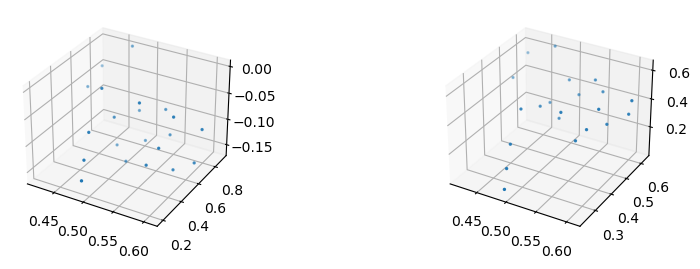

In [70]:
import matplotlib.pyplot as plt

original_points = []
rot_points = []

data = dataset.loc[0]
for idx in range(21):
    point = [data[f'x{idx}'], data[f'y{idx}'], data[f'z{idx}']]
    label = data['target']
    rotated_point = r1.apply(point)
    original_points.append(point)
    rot_points.append(rotated_point)

op = np.array(original_points).T
rp = np.array(rot_points).T

fig = plt.figure(figsize=(10, 3))
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122, projection="3d")

ax0.scatter(op[0],op[1],op[2],s=2)
ax1.scatter(rp[0],rp[1],rp[2],s=2)

print(label)

In [71]:
temp_dataset = []

for index, data in dataset.iterrows():
    for r in r_list:
        landmark_vertices_xyz = []
        for idx in range(21):
            point = [data[f'x{idx}'], data[f'y{idx}'], data[f'z{idx}']]
            rotated_point = r.apply(point)
            landmark_vertices_xyz.extend(rotated_point)

        temp_dataset.append((*landmark_vertices_xyz, data['target']))

landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)

dataset_rot = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
dataset_rot.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.463997,0.626226,6.262258e-01,0.420963,0.608527,0.550757,0.417118,0.530296,0.440567,0.479262,...,0.605647,0.566493,0.360452,0.554310,0.597894,0.428685,0.539328,0.605137,0.488303,1
1,0.463997,0.626226,-6.262258e-01,0.420963,0.550757,-0.608527,0.417118,0.440567,-0.530296,0.479262,...,0.605647,0.360452,-0.566493,0.554310,0.428685,-0.597894,0.539328,0.488303,-0.605137,1
2,0.328096,0.885617,-3.280956e-01,0.268781,0.819737,-0.326551,0.250082,0.686504,-0.339812,0.275952,...,0.325236,0.655449,-0.531278,0.307352,0.725901,-0.476561,0.322945,0.773178,-0.439779,1
3,0.328096,0.885617,3.280956e-01,0.326551,0.819737,0.268781,0.339812,0.686504,0.250082,0.401827,...,0.531278,0.655449,0.325236,0.476561,0.725901,0.307352,0.439779,0.773178,0.322945,1
4,-0.298130,0.954321,1.052729e-08,-0.281976,0.877307,-0.040849,-0.190484,0.780378,-0.063448,-0.078301,...,-0.035215,0.891730,-0.145693,-0.121333,0.905246,-0.119649,-0.165357,0.928082,-0.082614,1


In [80]:
print("original: ", len(dataset),", rotated: ",len(dataset_rot))
dataset = dataset.append(dataset_rot)
dataset.to_csv('data_augmented.csv', index=False)

original:  9301 , rotated:  55806


In [81]:
dataset['target'].value_counts()

5    10066
3     8232
7     7868
8     7287
9     6734
1     5761
4     5390
6     5390
2     4900
0     3479
Name: target, dtype: int64

# Classifier Training 

In [83]:
dataset = pd.read_csv('data_custom2.csv')
dataset2 = pd.read_csv('data_custom3.csv')
dataset = dataset.append(dataset2)

In [84]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['target'],axis=1).values
y = dataset['target'].values

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=43)

X_train.shape, X_val.shape, X_test.shape

((22895, 63), (7632, 63), (3053, 63))

In [85]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 63)                4032      
_________________________________________________________________
dropout_21 (Dropout)         (None, 63)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               8192      
_________________________________________________________________
dense_65 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_66 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)              

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_val_encoded = pd.get_dummies(y_val, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0


In [88]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [89]:
history = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=100,
    callbacks=[early_stop]
)

Train on 22895 samples, validate on 7632 samples
Epoch 1/100
22895/22895 [==============================] - 7s 303us/sample - loss: 2.1518 - acc: 0.1941 - val_loss: 1.7364 - val_acc: 0.3560
Epoch 2/100
22895/22895 [==============================] - 6s 250us/sample - loss: 1.7123 - acc: 0.3440 - val_loss: 1.5167 - val_acc: 0.3996
Epoch 3/100
22895/22895 [==============================] - 6s 259us/sample - loss: 1.5975 - acc: 0.3885 - val_loss: 1.4636 - val_acc: 0.4423
Epoch 4/100
22895/22895 [==============================] - 6s 261us/sample - loss: 1.5123 - acc: 0.4256 - val_loss: 1.4562 - val_acc: 0.4439
Epoch 5/100
22895/22895 [==============================] - 6s 262us/sample - loss: 1.5058 - acc: 0.4397 - val_loss: 1.3320 - val_acc: 0.5005
Epoch 6/100
22895/22895 [==============================] - 6s 261us/sample - loss: 1.4238 - acc: 0.4622 - val_loss: 1.4262 - val_acc: 0.4667
Epoch 7/100
22895/22895 [==============================] - 6s 259us/sample - loss: 1.4123 - acc: 0.4790 -

In [90]:
model.save('backup/asl_5.h5')

In [91]:
#test for 1st test data
labels = list('1234567890')
pred_idx = np.argmax(model.predict(X_test[100].reshape((1,-1))))
print(f'truth: {y_test[100]}, label: {pred_idx}')

truth: 6, label: 8


# Test and Evaluate Model

In [77]:
numbers = list('123456789').append('0')

class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, numbers)

  32/1526 [..............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

c:\Users\jinu7\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


1526/1526 [==============================] - 0s 93us/sample - loss: 0.0794 - acc: 0.9777
accuracy:  0.97771955


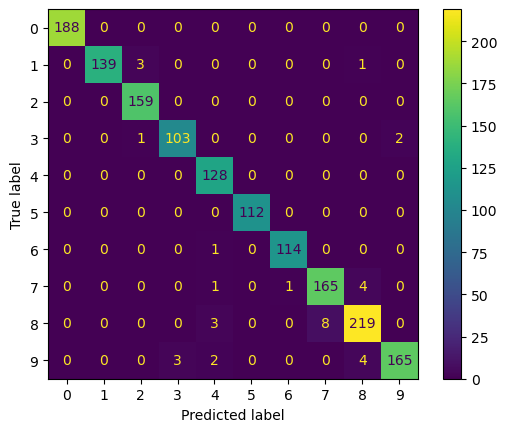

In [78]:
from sklearn.metrics import plot_confusion_matrix

y_test_int = [int(y) for y in y_test]
plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test_int)

acc = model.evaluate(X_test, y_test_encoded)[1]
print("accuracy: ",acc)

# Use Model

In [7]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2
import tensorflow as tf

model = tf.keras.models.load_model('backup/asl_5.h5')

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

<h3> Test with real time webcam

In [8]:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
  min_detection_confidence=0.5,
  min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = hands.process(image)
    pred = ""
    
    #image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    landmark_test = None

    if results.multi_hand_landmarks:
      
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks, 
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    landmark_vertices_xyz = []

    if results.multi_hand_landmarks:
      for l in results.multi_hand_landmarks[0].landmark:
          landmark_vertices_xyz.append(l.x)
          landmark_vertices_xyz.append(l.y)
          landmark_vertices_xyz.append(l.z)
      
      landmark_test= np.array(landmark_vertices_xyz)
      pred = (np.argmax(model.predict(landmark_test.reshape((1,-1))))), np.max(model.predict(landmark_test.reshape((1,-1))))

      if len(results.multi_hand_landmarks ) > 1:
        landmark_vertices_xyz = []
        for l in results.multi_hand_landmarks[1].landmark:
          landmark_vertices_xyz.append(l.x)
          landmark_vertices_xyz.append(l.y)
          landmark_vertices_xyz.append(l.z)
      
        landmark_test= np.array(landmark_vertices_xyz)
        pred2 = (np.argmax(model.predict(landmark_test.reshape((1,-1))))), np.max(model.predict(landmark_test.reshape((1,-1))))

        if pred2[1] > pred[1]:
          pred = pred2
      if pred[0] == 0:
        pred = (10, pred[1])
    # Flip the image horizontally for a selfie-view display.

    image = cv2.flip(image,1)

    cv2.putText(image,str(pred),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    cv2.imshow('MediaPipe Hands', image)

    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Break pressing q
        break
        
  cap.release()
  cv2.destroyAllWindows()

<h3> Test with saved video file

In [5]:
model = tf.keras.models.load_model('backup/asl_5.h5')

videofile = 'ASL_testset_sample.mp4'

cap = cv2.VideoCapture(videofile)

output = []

with mp_hands.Hands(
  min_detection_confidence=0.5,
  min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break
    
    pred = ""
    
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = hands.process(image)
    
    #image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    landmark_test = None

    if results.multi_hand_landmarks:
      
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    landmark_vertices_xyz = []

    if results.multi_hand_landmarks:
      for l in results.multi_hand_landmarks[0].landmark:
          landmark_vertices_xyz.append(l.x)
          landmark_vertices_xyz.append(l.y)
          landmark_vertices_xyz.append(l.z)
      
      landmark_test= np.array(landmark_vertices_xyz)
      pred = (np.argmax(model.predict(landmark_test.reshape((1,-1))))), np.max(model.predict(landmark_test.reshape((1,-1))))

      if len(results.multi_hand_landmarks ) > 1:
        landmark_vertices_xyz = []
        for l in results.multi_hand_landmarks[1].landmark:
          landmark_vertices_xyz.append(l.x)
          landmark_vertices_xyz.append(l.y)
          landmark_vertices_xyz.append(l.z)
      
        landmark_test= np.array(landmark_vertices_xyz)
        pred2 = (np.argmax(model.predict(landmark_test.reshape((1,-1))))), np.max(model.predict(landmark_test.reshape((1,-1))))

        if pred2[1] > pred[1]:
          pred = pred2

    # Flip the image horizontally for a selfie-view display.
      if pred[0] == 0:
        pred = (10, pred[1])
    output.append(pred)
    image = cv2.flip(image,1)
    
    cv2.putText(image,str(pred),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    cv2.imshow('MediaPipe Hands', image)

    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Break pressing q
        break
        
  cap.release()
  cv2.destroyAllWindows()

filePath = f'testresult/{videofile}.txt'

with open(filePath, 'w') as lf:
    for framenum, pred in enumerate(output):
        lf.write(f'{framenum} frame: {pred}\n')

Ignoring empty camera frame.
